In [1]:
import pandas as pd
import sql_functions as sf

schema = 'organic_africa' # UPDATE 'TABLE_SCHEMA' based on schema used in class 
engine = sf.get_engine()

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
farmers_df = sf.get_dataframe(f'SELECT * FROM {schema}.all_farmers')
farmers_df.shape

(20610, 22)

In [5]:

farmers_df[farmers_df['wc_nr']==41453.0]

,id,og_nr,og_code,production_unit,area,ward_nr/name,species,surname,first_names,sex,...,date_contracted,date_dropped_out,reason_dropped_out,address,organic_status,organic_status_from_date,fairtrade,ward_nr,wc_nr,wc_code
11490,8482,NaN,None,Northern Eastern region,Mt Darwin,4,baobab,Tsingano,Tamanikwa,male,...,2015-07-27,NaT,None,"Kapiripiri Pry Sch, Box 411, Mt Darwin",org,None,False,4.0,41453.0,MTWC


In [6]:

farmers_df[farmers_df['og_nr']==14046.0]

,id,og_nr,og_code,production_unit,area,ward_nr/name,species,surname,first_names,sex,...,date_contracted,date_dropped_out,reason_dropped_out,address,organic_status,organic_status_from_date,fairtrade,ward_nr,wc_nr,wc_code
7940,1905,14046.0,BNOG,Matabeleland North,Binga,5 Sinakoma,rosella,Munkuli,Fortunate,female,...,2018-08-31,NaT,None,Dongamuse Primary School Box 48,org,2018-08-31,True,5.0,NaN,None


One of the OA Goal is to **offer long-term contracts**. That is following KPI are analyzed:

### How many partner farmers does Organic Africa have?

- OA has **20610** total farmers registered. 
- OA had **20609** contracts over the years and **1** farmers have no info about contracts.
- From total *20609 contracts* **44%** were with **OGs** and **56%** with **WCs**
- OA had **9298** drop outs from contracts.
- OA has currently total **11312** partner farmers.


In [203]:
contracted = farmers_df[~farmers_df['date_contracted'].isna() | ~farmers_df['date_dropped_out'].isna()]
dropped = farmers_df[~farmers_df['date_dropped_out'].isna()]

og = farmers_df[~farmers_df['og_nr'].isna()]
wc = farmers_df[~farmers_df['wc_nr'].isna()]
still_contracted = farmers_df[farmers_df['date_dropped_out'].isna()]


In [221]:
overview = {
    'contracts': contracted.shape[0],
    'og': '{:,.2%}'.format(og.shape[0]/contracted.shape[0]),
    'wc': '{:,.2%}'.format(wc.shape[0]/contracted.shape[0]),
    'dropped': dropped.shape[0],
    'current':still_contracted.shape[0]
}

overview

{'contracts': 20609,
 'og': '44.12%',
 'wc': '55.88%',
 'dropped': 9298,
 'current': 11312}

In [ ]:
# reason_dropped_out over years

Regarding **contracts** 10 farmers of total 20610 registered farmers don't have date_contracted but 9 have a date_dropped out

Most of them are **wildcollectors** of the species **wild gotu kola** from the area **Chimanimani** with a **organic status**

In [205]:
# 10 farmers with date_contracted NaT but 9 have a date_dropped out

na_contracts_farmers = farmers_df[farmers_df['date_contracted'].isna()]
na_contracts_farmers[['surname','og_nr','wc_nr', 'area', 'species', 'organic_status','fairtrade', 'date_contracted', 'date_dropped_out', 'reason_dropped_out']]

,surname,og_nr,wc_nr,area,species,organic_status,fairtrade,date_contracted,date_dropped_out,reason_dropped_out
9131,Nyamayaro,13137.0,NaN,Mbire,rosella,dropout,False,NaT,2020-02-05,own choice
9132,Karimazaza,25706.0,NaN,Mbire,rosella,mabagrown,False,NaT,NaT,None
16482,Navaya,NaN,50881.0,Mudzi,"baobab, ximenia",new,False,NaT,2021-07-05,None
20603,Chikati,NaN,1871.0,Chimanimani,wild gotu kola,reinstated,False,NaT,2021-01-29,None
20604,Faifi,NaN,1861.0,Chimanimani,wild gotu kola,reinstated,False,NaT,2021-01-29,None
20605,Zaranyika,NaN,1057.0,Chimanimani,wild gotu kola,reinstated,False,NaT,2021-01-29,None
20606,Chibawana,NaN,21040.0,Chimanimani,wild gotu kola,reinstated,False,NaT,2021-01-29,None
20607,Hofisi,NaN,2555.0,Chimanimani,wild gotu kola,reinstated,False,NaT,2021-01-29,None
20608,Mudada,NaN,2066.0,Chimanimani,wild gotu kola,reinstated,False,NaT,2021-01-29,None
20609,Nyamwazha,NaN,1069.0,Chimanimani,wild gotu kola,reinstated,False,NaT,2021-01-29,None


## Trend of contracted farmers over year 

In [206]:
contracts_over_year = contracted.groupby([contracted['date_contracted'].dt.year.astype('Int64')])['date_contracted', 'og_nr', 'wc_nr', 'date_dropped_out'].count()

/var/folders/x5/v1d8l9v94679fhr8vd07ys9c0000gn/T/ipykernel_10182/328347199.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  contracts_over_year = contracted.groupby([contracted['date_contracted'].dt.year.astype('Int64')])['date_contracted', 'og_nr', 'wc_nr', 'date_dropped_out'].count()


The following table has the number of contracts and drops each year:

In [207]:
contracts_over_year.columns = ['total_contracted','num_og', 'num_wc', 'total_dropped']
contracts_over_year.index.names = ['YEAR']
contracts_over_year

,total_contracted,num_og,num_wc,total_dropped
YEAR,,,,
1979,1,0,1,0
1982,1,0,1,0
1985,1,1,0,1
1989,1,0,1,0
2011,1,1,0,1
2012,469,47,422,99
2013,399,38,361,63
2014,1504,38,1466,843
2015,1136,55,1081,52


The graphic shows a peak in 2018 for new contracts AND dropouts!

<Axes: xlabel='YEAR'>

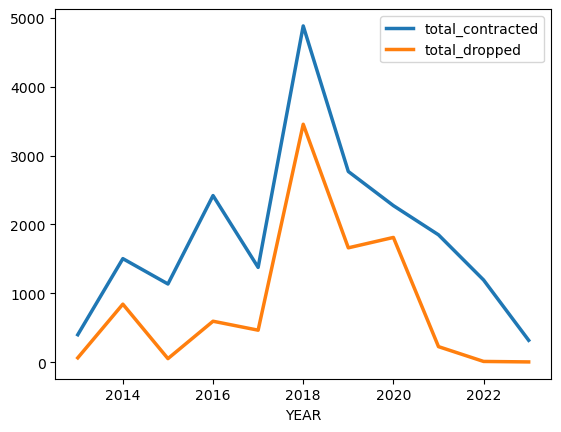

In [208]:
contracts_over_year[contracts_over_year.index>2012][['total_contracted', 'total_dropped']].plot()

**Dropped** has similar statistics like **og** 

In [209]:
contracts_over_year.describe()

,total_contracted,num_og,num_wc,total_dropped
count,17.000000,17.000000,17.000000,17.000000
mean,1211.764706,534.764706,677.000000,546.411765
std,1331.553300,969.203638,728.506863,944.032909
min,1.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000
50%,1136.000000,47.000000,422.000000,63.000000
75%,1850.000000,515.000000,1226.000000,595.000000
max,4884.000000,3486.000000,2420.000000,3456.000000


In [210]:
def calc_distr(row):
     row['og'] = round(row['og']/row['total'], 4)
     row['wc'] = round(row['wc']/row['total'], 4)
     row['total'] = row["og"]+row["wc"]
     return row

In [211]:
contracts_over_year_percent = contracts_over_year
contracts_over_year_percent.columns = ['total','og','wc','total_dropped']

contracts_over_year_percent = contracts_over_year_percent.apply(calc_distr, axis=1)

contracts_over_year_percent['majority'] = contracts_over_year_percent[['og','wc']].idxmax(axis=1)

contracts_over_year_percent['og'] = contracts_over_year_percent['og'].transform(lambda x: '{:,.0%}'.format(x), axis=0)
contracts_over_year_percent['wc'] = contracts_over_year_percent['wc'].transform(lambda x: '{:,.0%}'.format(x))
contracts_over_year_percent['total'] = contracts_over_year_percent['total'].transform(lambda x: '{:,.0%}'.format(x))
del contracts_over_year_percent['total_dropped']

contracts_over_year_percent = contracts_over_year_percent[['og','wc','total','majority']]
contracts_over_year_percent

,og,wc,total,majority
YEAR,,,,
1979,0%,100%,100%,wc
1982,0%,100%,100%,wc
1985,100%,0%,100%,og
1989,0%,100%,100%,wc
2011,100%,0%,100%,og
2012,10%,90%,100%,wc
2013,10%,90%,100%,wc
2014,3%,97%,100%,wc
2015,5%,95%,100%,wc


In [ ]:
# contracs-dropped per year

Over the years **~ 64,7%** of the partner farmers of OA are **Wildcollector**

But since 2018 many **OG** are contracted -> 

In [212]:
# From 1979 to 2023
# wc majority    11 times
# og majority     6 times

maj = contracts_over_year_percent['majority'].value_counts()
maj[0]/(maj[0]+maj[1])

0.6470588235294118

contracts_over_year_from_2012 = contracts_over_year[contracts_over_year.index>2012]
contracts_over_year_from_2012

over_years_from_2012 = contracts_over_year_from_2012.index
contracted_farmers_type = {
    'WC': contracts_over_year_from_2012['num_wc'],
    'OG': contracts_over_year_from_2012['num_og'],
}
width = 0.85  # the width of the bars: can also be len(x) sequence


fig, ax = plt.subplots()
bottom = np.zeros(3)

for farmer_type, type_count in contracted_farmers_type.items():
    p = ax.bar(over_years_from_2012, type_count, width, label=farmer_type, bottom=bottom)
    bottom += type_count

    ax.bar_label(p, label_type='center')

ax.set_title('Number of contracts by partners farmers type')
ax.legend()

plt.show()

#### Cumulative sum

In [213]:
cum_contracts_over_year = contracts_over_year.cumsum()
cum_contracts_over_year.columns = ['cum_sum_contracted','cum_sum_og', 'cum_sum_wc', 'cum_sum_dropped']
cum_contracts_over_year

,cum_sum_contracted,cum_sum_og,cum_sum_wc,cum_sum_dropped
YEAR,,,,
1979,1,0,1,0
1982,2,0,2,0
1985,3,1,2,1
1989,4,1,3,1
2011,5,2,3,2
2012,474,49,425,101
2013,873,87,786,164
2014,2377,125,2252,1007
2015,3513,180,3333,1059


<Axes: xlabel='YEAR'>

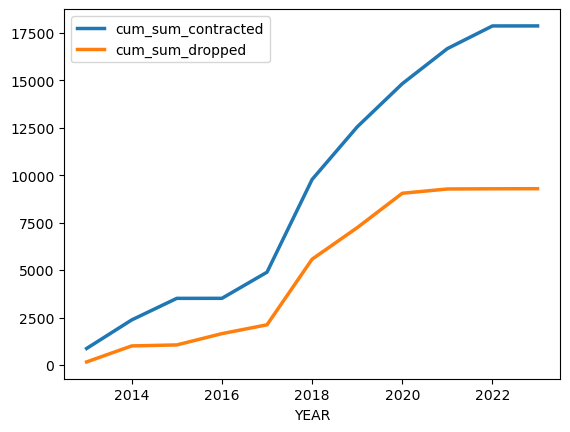

In [214]:
cum_contracts_over_year[cum_contracts_over_year.index>2012][['cum_sum_contracted', 'cum_sum_dropped']].plot()

<Axes: xlabel='YEAR'>

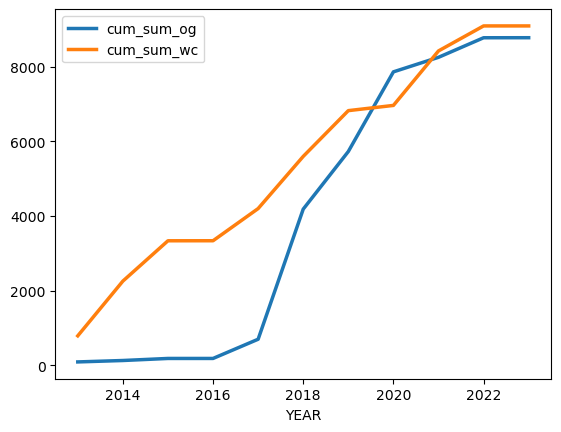

In [216]:
cum_contracts_over_year[cum_contracts_over_year.index>2012][['cum_sum_og', 'cum_sum_wc']].plot()

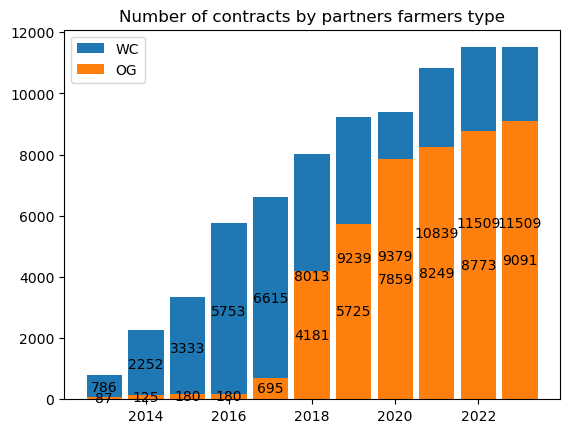

In [215]:
over_years_from_2012 = cum_contracts_over_year_from_2012.index
contracted_farmers_type = {
    'WC': cum_contracts_over_year_from_2012['cum_sum_wc'],
    'OG': cum_contracts_over_year_from_2012['cum_sum_og'],
}
width = 0.85  # the width of the bars: can also be len(x) sequence


fig, ax = plt.subplots()

for farmer_type, type_count in contracted_farmers_type.items():
    p = ax.bar(over_years_from_2012, type_count, width, label=farmer_type)
    #bottom += type_count

    ax.bar_label(p, label_type='center')

ax.set_title('Number of contracts by partners farmers type')
ax.legend()

plt.show()

## How long do farmers stick with OA?

## Do organic certified farmers grow over time?